---
# Jeanette's Workbook
---


In [1]:
import pandas as pd

# Acquire
import requests
from bs4 import BeautifulSoup
import api

# Explore
import matplotlib.pyplot as plt

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)


---
# Acquire
---

In [2]:
# Collecting the data from the API and converting it into a csv
csv_url = f'https://api.covidactnow.org/v2/country/US.timeseries.csv?apiKey={api.key}'
req = requests.get(csv_url)
url_content = req.content

# Create a csv and open it to recieve content
csv_file = open('aggregated_us_data.csv', 'wb')

# Write content into csv file
csv_file.write(url_content)

# Save and Close csv file
csv_file.close()

---
# Prepare
---

In [3]:
# Read the csv into a dataframe
covid = pd.read_csv('aggregated_us_data.csv', index_col=0)
covid.head()

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,unused1,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,unused2,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,metrics.testPositivityRatio,metrics.testPositivityRatioDetails,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,actuals.vaccinationsAdditionalDose,metrics.vaccinationsAdditionalDoseRatio,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.12,1.04,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,US,NaN,NaN,0,NaN,NaN,iso1:us,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.13,1.02,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,US,NaN,NaN,0,NaN,NaN,iso1:us,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.14,1.01,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# How big is this dataframe?
covid.shape

(799, 53)

In [5]:
# How many nulls are in the data? 
covid.isna().sum()

country                                        0
state                                        799
county                                       799
fips                                           0
lat                                          799
long                                         799
locationId                                     0
actuals.cases                                  0
actuals.deaths                                 0
actuals.positiveTests                         61
actuals.negativeTests                         56
actuals.contactTracers                       192
actuals.hospitalBeds.capacity                268
actuals.hospitalBeds.currentUsageTotal       268
actuals.hospitalBeds.currentUsageCovid       268
unused1                                      799
actuals.icuBeds.capacity                     268
actuals.icuBeds.currentUsageTotal            268
actuals.icuBeds.currentUsageCovid            268
unused2                                      799
actuals.newCases    

In [6]:
# There are some columns with no data, so I'm gonna drop those
covid.drop(columns=['state',
                   'county',
                   'lat',
                   'long',
                   'unused1',
                   'unused2',
                   'metrics.testPositivityRatioDetails',
                   'unused3',
                   'unused4'], inplace=True)

covid.isna().sum()

country                                        0
fips                                           0
locationId                                     0
actuals.cases                                  0
actuals.deaths                                 0
actuals.positiveTests                         61
actuals.negativeTests                         56
actuals.contactTracers                       192
actuals.hospitalBeds.capacity                268
actuals.hospitalBeds.currentUsageTotal       268
actuals.hospitalBeds.currentUsageCovid       268
actuals.icuBeds.capacity                     268
actuals.icuBeds.currentUsageTotal            268
actuals.icuBeds.currentUsageCovid            268
actuals.newCases                               2
actuals.vaccinesDistributed                  328
actuals.vaccinationsInitiated                328
actuals.vaccinationsCompleted                328
metrics.testPositivityRatio                   61
metrics.caseDensity                            1
metrics.contactTrace

In [7]:
# Now I'll drop those columns missing more than half thier data
covid.drop(columns=['actuals.vaccinesDistributed',
                   'actuals.vaccinationsInitiated',
                   'actuals.vaccinationsCompleted',
                   'metrics.vaccinationsInitiatedRatio',
                   'metrics.vaccinationsCompletedRatio',
                   'actuals.vaccinesAdministered',
                   'actuals.vaccinationsAdditionalDose',
                   'metrics.vaccinationsAdditionalDoseRatio'], inplace=True)

covid.isna().sum()

country                                        0
fips                                           0
locationId                                     0
actuals.cases                                  0
actuals.deaths                                 0
actuals.positiveTests                         61
actuals.negativeTests                         56
actuals.contactTracers                       192
actuals.hospitalBeds.capacity                268
actuals.hospitalBeds.currentUsageTotal       268
actuals.hospitalBeds.currentUsageCovid       268
actuals.icuBeds.capacity                     268
actuals.icuBeds.currentUsageTotal            268
actuals.icuBeds.currentUsageCovid            268
actuals.newCases                               2
metrics.testPositivityRatio                   61
metrics.caseDensity                            1
metrics.contactTracerCapacityRatio           193
metrics.infectionRate                          2
metrics.infectionRateCI90                      2
metrics.icuCapacityR

In [8]:
covid.head()

,country,fips,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,US,0,iso1:us,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,US,0,iso1:us,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Is there a need for fips?
# It looks like there is only one value so it should be safe to drop
covid.fips.value_counts()

0    799
Name: fips, dtype: int64

In [10]:
# Can I drop location too?
covid.locationId.value_counts()

iso1:us    799
Name: locationId, dtype: int64

In [11]:
# Does 'actuals.deaths' have variety?
covid['actuals.deaths'].value_counts().head()

0         39
12         2
610400     1
608089     1
608446     1
Name: actuals.deaths, dtype: int64

Yes, there is variety in 'actuals.deaths' so I'll keep it.

In [12]:
# I'll drop the location columns because they all say the same thing
covid.drop(columns=['country',
                    'fips', 
                    'locationId'], inplace=True)
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
covid.isna().sum()

actuals.cases                                  0
actuals.deaths                                 0
actuals.positiveTests                         61
actuals.negativeTests                         56
actuals.contactTracers                       192
actuals.hospitalBeds.capacity                268
actuals.hospitalBeds.currentUsageTotal       268
actuals.hospitalBeds.currentUsageCovid       268
actuals.icuBeds.capacity                     268
actuals.icuBeds.currentUsageTotal            268
actuals.icuBeds.currentUsageCovid            268
actuals.newCases                               2
metrics.testPositivityRatio                   61
metrics.caseDensity                            1
metrics.contactTracerCapacityRatio           193
metrics.infectionRate                          2
metrics.infectionRateCI90                      2
metrics.icuCapacityRatio                     268
riskLevels.overall                             0
actuals.newDeaths                              3
riskLevels.caseDensi

In [14]:
# Okay I shouldn't have this many columns left
# I'm gonna make a function that drops all columns with more than 30% nulls

def drop_null_columns(dataframe):
    # make a list of the columns
    column_list = dataframe.columns.to_list()
    
    for column in column_list:
        # check if column has more than 30% nulls
        if ((dataframe[column].isna().sum()) / dataframe.shape[0]) > 0.30 :
            # if more than 30% nulls drop the column
            dataframe.drop(columns=[column], inplace=True)
    
    return dataframe

In [15]:
# Using my new function
drop_null_columns(covid)

# Check the numbers
covid.isna().sum()

actuals.cases                           0
actuals.deaths                          0
actuals.positiveTests                  61
actuals.negativeTests                  56
actuals.contactTracers                192
actuals.newCases                        2
metrics.testPositivityRatio            61
metrics.caseDensity                     1
metrics.contactTracerCapacityRatio    193
metrics.infectionRate                   2
metrics.infectionRateCI90               2
riskLevels.overall                      0
actuals.newDeaths                       3
riskLevels.caseDensity                  0
cdcTransmissionLevel                    0
metrics.weeklyNewCasesPer100k           1
dtype: int64

In [16]:
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,0,0.0
2020-01-22,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,0.0
2020-01-23,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,0,0.0,0,0,0.0
2020-01-24,2,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,0,0.0,0,0,0.0
2020-01-25,3,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,0,0.0,0,0,0.0


---
# Explore
---

In [17]:
def view_hist(dataframe):
    # make a list of the columns
    column_list = dataframe.columns.to_list()
    
    for column in column_list:
        dataframe[column].hist()
        plt.title(column)
        plt.show()
    return 0

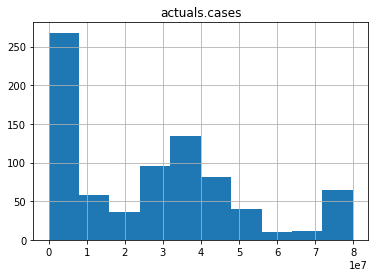

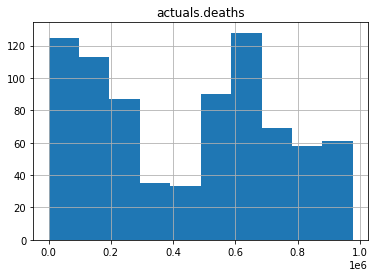

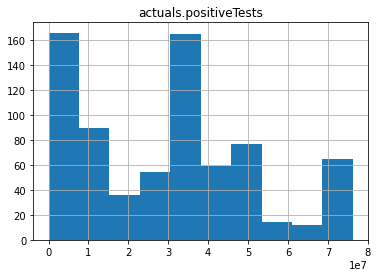

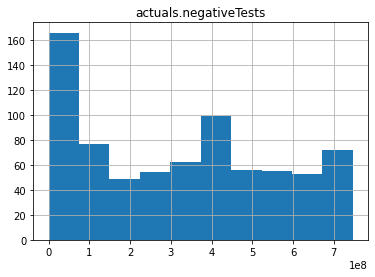

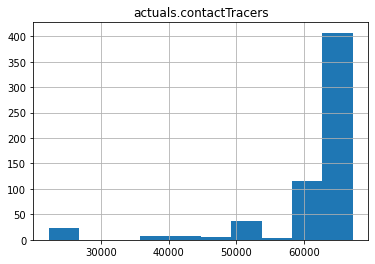

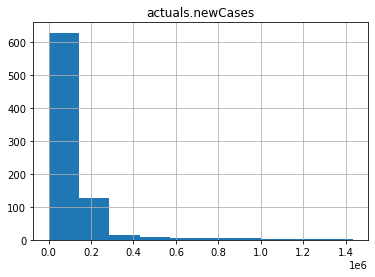

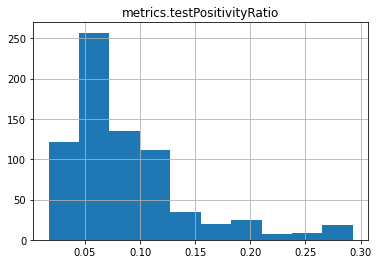

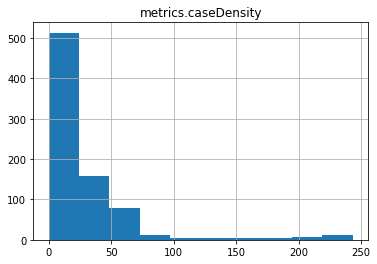

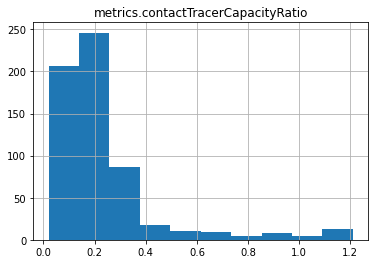

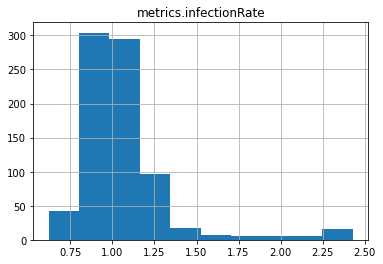

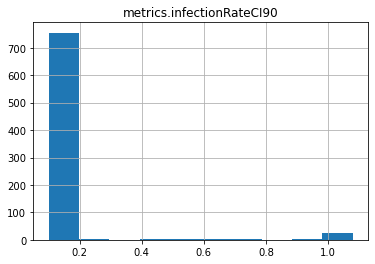

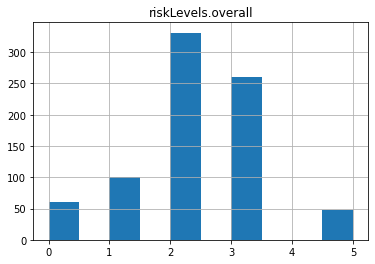

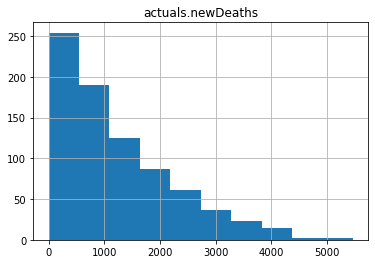

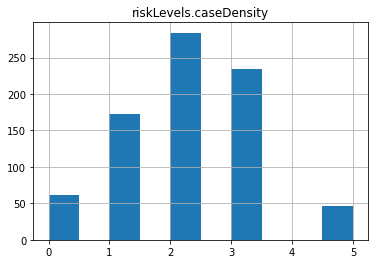

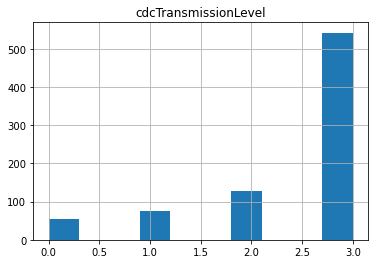

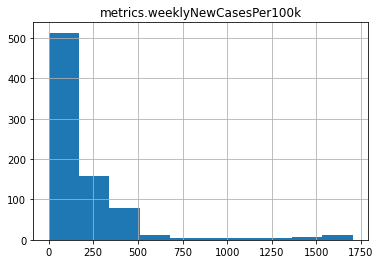

0

In [18]:
# Lets look atthe histograms for each column
view_hist(covid)

---
# Modeling
---

### Baseline Model

In [19]:
# code here

---
# Evaluate
---

In [20]:
# code here

---
# Conclusion
---

Summary goes here